# Titanic - Machine Learning from Disaster
## Kaggle Competition

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line.

### In this exercise, we will try to predict whether a passenger on the Titanic would have survived or not.

In [43]:
# Import the necessary libraries 

import pandas as pd
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight

#### Read the competion data 

In [44]:
dfTrain = pd.read_csv('./Data/train.csv')
dfTest = pd.read_csv('./Data/test.csv')

#### Inspect the data

In [45]:
# Interactive data report by pandas_profiling
#from pandas_profiling import ProfileReport
#prof = ProfileReport(dfTrain)
#prof.to_file(output_file='output.html')

## Exploratory data analysis

In [46]:
print('Info about train data: \n')
display(dfTrain.info())

print('Info about test data: \n')
display(dfTest.info())

Info about train data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

Info about test data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [47]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Features:
 - survival:  Survival                                   (0 = No, 1 = Yes)
 - PassengerId: Unique Id of a passenger
 - pclass: Ticket class (1= 1st, 2: 2nd, 3: 3rd)
 - sex: Sex
 - Age: Age in years
 - sibsp: # of siblings / spouses aboard the Titanic
 - parch: # of parents / children aboard the Titanic
 - ticket: Ticket number
 - fare: Passenger fare
 - cabin: Cabin number
 - embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [48]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The table above shows us the following:
- To make sure that our machine learning models can process all our features we have to either convert categorical variables into numerical or one-hot encode them.
- The features have widely different ranges so that we need to scale them.

In [49]:
print('Missing values in train data: \n')
display(dfTrain.isna().sum())

print('Missing values in test data: \n')
display(dfTest.isna().sum())

Missing values in train data: 



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test data: 



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- As you can see there are a lot of missing values in 'Age' and 'Cabin', a few in 'Embarked' and 'Fare'.                  
- We are going to handle these in the section below. 

### Detecting outliers 

In [50]:
data = dfTrain[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

fig = ff.create_scatterplotmatrix(data, diag='box', index='Survived',
                                  height=800, width=800)
fig['layout']['title'] = "Titanic data outliers"
py.iplot(fig, filename='Titanic Outliers')

![Titanic_scatter_matrix](/img/Titanic_scatter_matrix.png)

Interactive Plot -> (https://plotly.com/~tobiasschulz/46/)

#### Checking the survial of different ages and pclass

In [51]:
fig = px.violin(dfTrain, y="Age", x="Pclass", color="Survived", box=True,
          hover_data=dfTrain.columns)
fig['layout']['title'] = "Violin plot showing Age and Pclass seperated by 'Survived'"
py.iplot(fig, filename='Titanic violin plot - Age and Pclass, Survived')
fig.show()

![Violin plot - Age, Pclass, Survived](/img/Titanic_violin_plot-Age_Pclass_Survived.png)

Interactive Plot -> (https://plotly.com/~tobiasschulz/49/)

- As you can see Pclass 2 and 3 have a very sharp peak near the 20-35 age range
- Whereas Pclass 1 has far more survivors across all age levels except after 50
- So AGE definitely plays a factor in survival and this is not just limited to the kids getting a higher survival rate. There are other factors at play as well. It is important to get the missing ages right and we should not be relying just on the mean to fill the same.

#### Checking the survival of different port of embarkanation, pclass and sex

<Figure size 432x288 with 0 Axes>

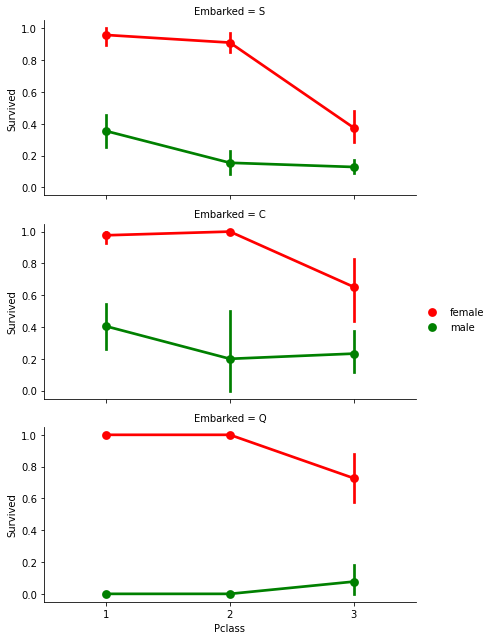

In [52]:
plt.figure()
fg = sns.FacetGrid(dfTrain, row='Embarked', aspect=2)
fg.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', \
       hue_order=['female', 'male'], order=[1,2,3], palette={'female': "r", 'male': "g"})
fg.add_legend();

- In embark=S, females in Pclass3 do extremely poorly against the other 2 classes. The difference is not so glaring in the other 2 ports. 
- In Embarked=C, Pclass=2 females have higher chance of survival than Pclass=1. 
- Embarked=Q has extremely high fatility rates for Males. For some strange reason Pclass=3 have higher chances of survival in this port.

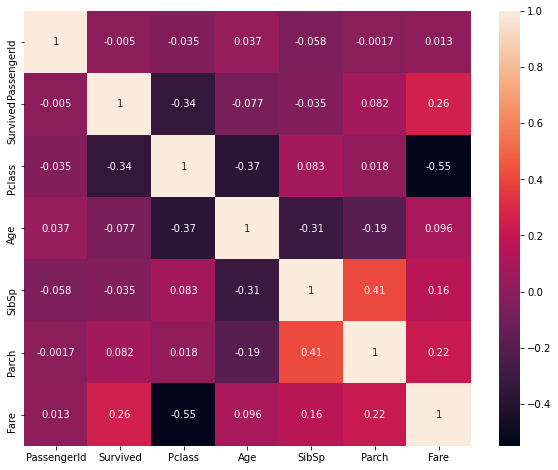

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(dfTrain.corr(), annot=True);

## Handling missing data and creating new features

- filling missing 'Fare' with median
- after a short online search we were able to find the two persons of the missing values in 'Embarked' on wikipedia and research their port of embarkation

In [54]:
combined=dfTrain.append(dfTest)

for df in [dfTrain, dfTest, combined]:
    df['PeopleInTicket']=df['Ticket'].map(combined['Ticket'].value_counts())
    df['FarePerPerson']=df['Fare']/df['PeopleInTicket']

dfTest.loc[dfTest.Fare.isnull(), ['Fare','FarePerPerson']] = round(dfTrain[(dfTrain.Embarked=='S') & (dfTrain.Pclass==3) & (dfTrain.PeopleInTicket==1)]['Fare'].mean(),1)

In [55]:
dfTrain.loc[dfTrain['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2,40.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2,40.0


In [56]:
dfTrain.loc[dfTrain['Embarked'].isnull(), 'Embarked'] = 'S'

- Extract titles from name and build a new feature from that¶


In [57]:
dataset = [dfTrain, dfTest]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5, "FemaleChild": 6}

for d in dataset:
    # extract titles
    d['Title'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    d['Title'] = d['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    #replace "Mlle" (Mademoiselle) with "Miss"
    d['Title'] = d['Title'].replace('Mlle', 'Miss')
    d['Title'] = d['Title'].replace('Ms', 'Miss')
    # replace "Mme" (Madame) with "Mrs"
    d['Title'] = d['Title'].replace('Mme', 'Mrs')
    d.loc[(d.Title=='Miss') & (d.Parch!=0) & (d.PeopleInTicket>1), 'Title']="FemaleChild"
    # convert titles into numbers
    d['Title'] = d['Title'].map(titles)
    # filling NaN with 0, to get safe
    d['Title'] = d['Title'].fillna(0)

dfTrain.drop(columns=['Name'], inplace=True)
dfTest.drop(columns=['Name'], inplace=True)

- filling Age with group mean of "Pclass, sex and title"

In [58]:
dataset = [dfTrain, dfTest]

grp = dfTrain.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]
    ## Here 'x' is the row containing the missing age. We look up the row's Pclass
    ## Sex and Title against the lookup table return the Age

## Now call this fill_age function for every missing row in dfTest and dfTrain
dfTrain['Age'], dfTest['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in dataset]

- Minimizing influence of outliers in age by creating age groups 

In [59]:
#dataset = [dfTrain, dfTest]
#for d in dataset:
#    d.loc[d['Age'] <= 11, 'Age'] = 0
#    d.loc[(d['Age'] > 11) & (d['Age'] <= 18), 'Age'] = 1
#    d.loc[(d['Age'] > 18) & (d['Age'] <= 22), 'Age'] = 2
#    d.loc[(d['Age'] > 22) & (d['Age'] <= 27), 'Age'] = 3
#    d.loc[(d['Age'] > 27) & (d['Age'] <= 33), 'Age'] = 4
#    d.loc[(d['Age'] > 33) & (d['Age'] <= 40), 'Age'] = 5
#    d.loc[(d['Age'] > 40) & (d['Age'] <= 66), 'Age'] = 6
#    d.loc[d['Age'] > 66, 'Age'] = 6

### Calculate new combined feature from age and Pclass

In [60]:
data = [dfTrain, dfTest]
for dataset in data:
    dataset['Age_Class']= dataset['Age'] * dataset['Pclass']

### Bining of fare 

In [61]:
datasets = [dfTrain, dfTest]

for d in datasets:
    d.loc[d['Fare'] <= 7.91, 'Fare'] = 0
    d.loc[(d['Fare'] > 7.91) & (d['Fare'] <= 14.454), 'Fare'] = 1
    d.loc[(d['Fare'] > 14.454) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[(d['Fare'] > 31) & (d['Fare'] <= 99), 'Fare']   = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare']   = 4
    d.loc[d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].astype(int)

### Use cabin nr to get deck info

<img src="./img/Titianic_cabin.png" width="250" allign="center">


In [62]:
dfTrain['Deck'] = dfTrain['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
dfTest['Deck'] = dfTest['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

# in our Train Data there is a row with T as Deck which is no Deck on Titanic
# with looking at the fare it seems that this should be an 'A'
idx = dfTrain[dfTrain['Deck'] == 'T'].index
dfTrain.loc[idx, 'Deck'] = 'A'

dfTrain.drop(columns=['Cabin'], inplace=True)
dfTest.drop(columns=['Cabin'], inplace=True)

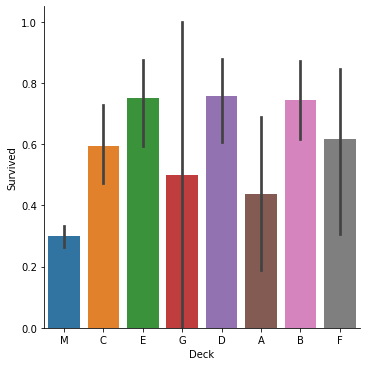

In [63]:
sns.catplot(data=dfTrain, x='Deck', y='Survived', kind='bar');

In [64]:
# create combined feature for parch, sibsp and age
dataset = [dfTrain, dfTest]

for d in dataset:
    d['x2'] = d['Parch'] + d['SibSp'] + 1 + (d['Age'] / d['Age'].max())

In [65]:
# create feature for total relatives of a person and column for "alone or not alone"
dataset = [dfTrain, dfTest]

for d in dataset:
    d['relatives'] = d['SibSp'] + d['Parch']
    d.loc[d['relatives'] > 0, 'not_alone'] = 0
    d.loc[d['relatives'] == 0, 'not_alone'] = 1
    d['not_alone'] = d['not_alone'].astype(int)
display(dfTrain['not_alone'].value_counts())
display(dfTrain['relatives'].value_counts())

1    537
0    354
Name: not_alone, dtype: int64

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

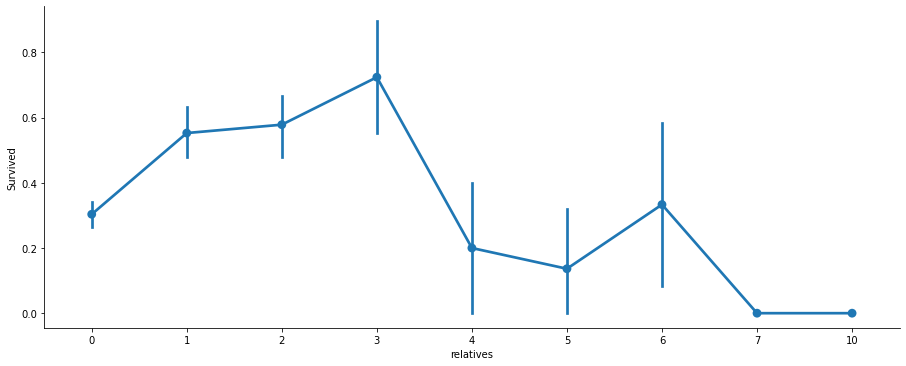

In [66]:
sns.factorplot(x='relatives', y='Survived', data=dfTrain, aspect = 2.5);

In [67]:
location = {"S": 0, "C": 2, "Q": 1}
data = [dfTrain, dfTest]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(location)

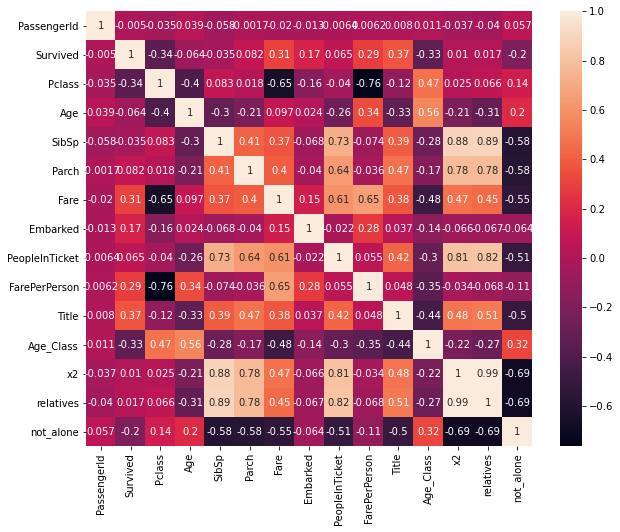

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(dfTrain.corr(), annot=True);

In [69]:
dataset = [dfTrain, dfTest]

for d in dataset:
    d.drop(["PassengerId","Ticket", "not_alone", "Deck", "FarePerPerson", "Parch", "PeopleInTicket", "relatives", "SibSp", 'x2', 'Age'], axis=1, inplace=True)

In [70]:
train_numerical_features = list(dfTrain.select_dtypes(include=['int64', 'float64', 'int32']).columns)
del train_numerical_features[0]
train_numerical_features

['Pclass', 'Fare', 'Embarked', 'Title', 'Age_Class']

In [71]:
# Feature scaling - Standard scaler
ss_scaler = StandardScaler()
dfTrain_ss = pd.DataFrame(data = dfTrain)
dfTrain_ss[train_numerical_features] = ss_scaler.fit_transform(dfTrain_ss[train_numerical_features])

In [72]:
test_numerical_features = list(dfTest.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['Pclass', 'Fare', 'Embarked', 'Title', 'Age_Class']

In [73]:
# Feature scaling - Standard scaler
test_ss_scaler = StandardScaler()
dfTest_ss = pd.DataFrame(data = dfTest)
dfTest_ss[test_numerical_features] = test_ss_scaler.fit_transform(dfTest_ss[test_numerical_features])

In [74]:
# One-Hot encoding / Dummy variables
encode_col_list = list(dfTrain.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    dfTrain_ss = pd.concat([dfTrain_ss,pd.get_dummies(dfTrain_ss[i], prefix=i)],axis=1)
    dfTrain_ss.drop(i, axis = 1, inplace=True)

In [75]:
# One-Hot encoding / Dummy variables
test_encode_col_list = list(dfTest.select_dtypes(include=['object']).columns)
for i in test_encode_col_list:
    dfTest_ss = pd.concat([dfTest_ss,pd.get_dummies(dfTest_ss[i], prefix=i)],axis=1)
    dfTest_ss.drop(i, axis = 1, inplace=True)

In [76]:
dfTrain_ss

,Survived,Pclass,Fare,Embarked,Title,Age_Class,Sex_female,Sex_male
0,0,0.827377,-1.268117,-0.585954,-0.670728,0.073704,0,1
1,1,-1.566107,1.147903,1.942303,0.679823,-0.787114,1,0
2,1,0.827377,-0.462777,-0.585954,0.004547,0.442626,1,0
3,1,-1.566107,1.147903,-0.585954,0.679823,-0.879345,1,0
4,0,0.827377,-0.462777,-0.585954,-0.670728,1.272700,0,1
...,...,...,...,...,...,...,...,...
886,0,-0.369365,-0.462777,-0.585954,2.030374,-0.295218,0,1
887,1,-1.566107,0.342563,-0.585954,0.004547,-1.371241,1,0
888,0,0.827377,0.342563,-0.585954,2.705650,-1.355869,1,0
889,1,-1.566107,0.342563,1.942303,-0.670728,-1.156036,0,1


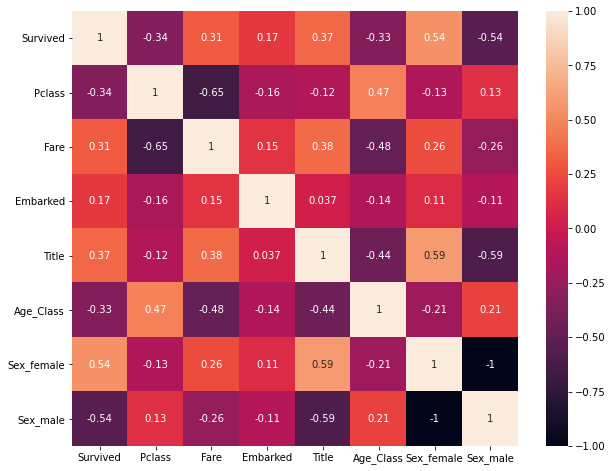

In [77]:
plt.figure(figsize=(10,8))
sns.heatmap(dfTrain_ss.corr(), annot=True);

In [78]:
dfTest_ss

,Pclass,Fare,Embarked,Title,Age_Class,Sex_female,Sex_male
0,0.873482,-1.206789,0.470915,-0.688273,1.464941,0,1
1,0.873482,-1.206789,-0.700767,0.787102,2.791960,1,0
2,-0.315819,-0.443646,0.470915,-0.688273,2.190378,0,1
3,0.873482,-0.443646,-0.700767,-0.688273,0.668730,0,1
4,0.873482,-0.443646,-0.700767,0.787102,0.137922,1,0
...,...,...,...,...,...,...,...
413,0.873482,-0.443646,-0.700767,-0.688273,0.851847,0,1
414,-1.505120,1.845785,1.642598,2.262477,-0.817531,1,0
415,0.873482,-1.206789,-0.700767,-0.688273,1.889587,0,1
416,0.873482,-0.443646,-0.700767,-0.688273,0.851847,0,1


In [79]:
X_train = dfTrain_ss.drop(['Survived'], axis=1)
y_train = dfTrain_ss['Survived']

X_test = dfTest_ss

In [80]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
rf_pred = rf.predict(X_test)
rf_pred

0.9472502805836139


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

- RandomForesClassifier with default settings gave a kaggle score of 0.76555 

In [81]:
svclassifier = SVC(kernel='poly')
sv = svclassifier.fit(X_train, y_train)
print(sv.score(X_train, y_train))
svc_pred = svclassifier.predict(X_test)
svc_pred

0.8282828282828283


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
ID = pd.read_csv('./Data/test.csv')
ID = ID['PassengerId']

In [83]:
sub = pd.DataFrame({'PassengerId': ID, 'Survived':svc_pred })

In [84]:
sub.to_csv('./previous_submissions/submission_svc6.csv', index=False)